In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
! pip install keras
! pip install sciPy
! pip install numpy

In [2]:
data = pd.read_csv("./Admission_Predict_A3.csv")

print(data.head())

df = pd.DataFrame(data)

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [3]:
summary = df.describe()
display(summary)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
missing_values_per_column = df.isnull().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
print("Columns with missing values:\n", columns_with_missing_values)

Columns with missing values:
 Series([], dtype: int64)


no column has missing values

In [5]:
duplicates = df.duplicated()

# Counting number of duplicate rows
num_duplicates = duplicates.sum()

# Displaying the duplicate rows
print("Number of duplicate rows:", num_duplicates)
if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(df[duplicates])

Number of duplicate rows: 0


No duplicates in data

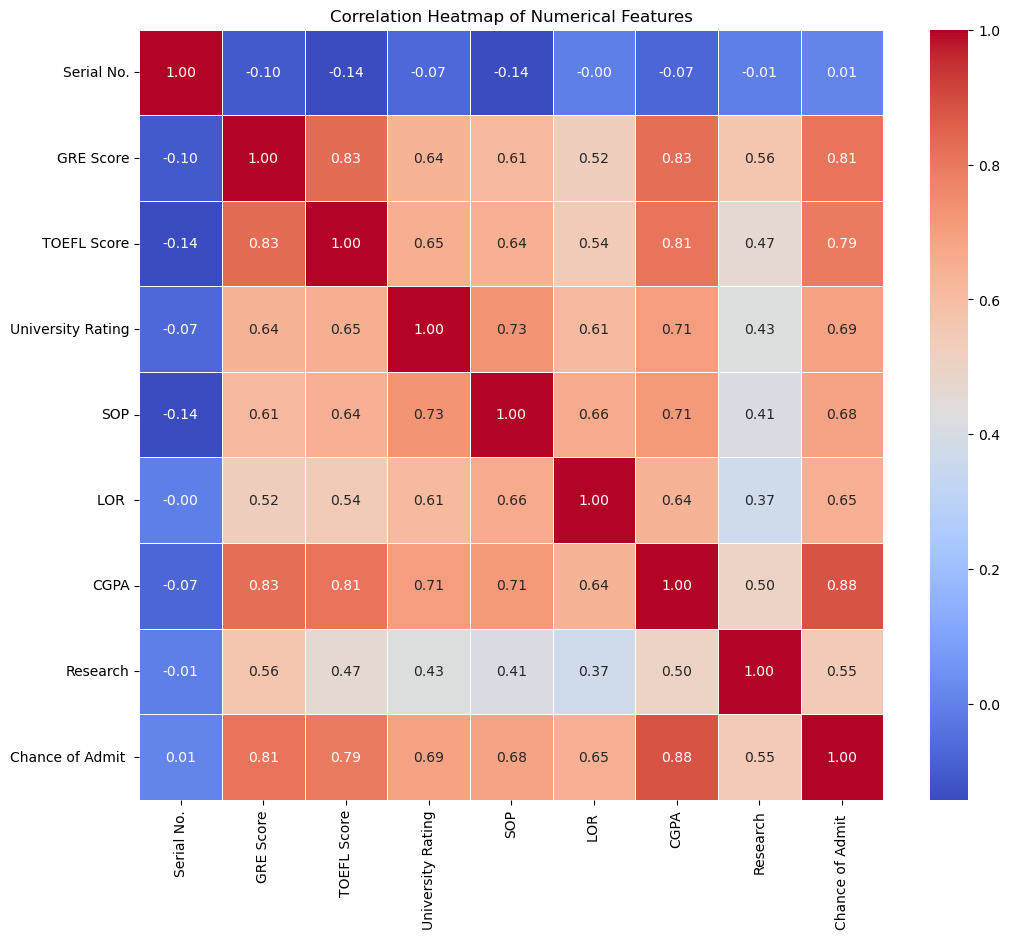

In [6]:
corr_matrix = df.corr()

# Plotting the HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [7]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (values outside 1.5 * IQR)
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Check how many outliers per column

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Research             0
Chance of Admit      2
dtype: int64


As we can see very less outliers so our best approach would be just to drop them

In [8]:
cleaned_data = data.copy()

# Remove outliers
for column in cleaned_data.columns:
    if column != 'Serial No.':
        cleaned_data = cleaned_data[~((cleaned_data[column] < (Q1[column] - 1.5 * IQR[column])) |
                                       (cleaned_data[column] > (Q3[column] + 1.5 * IQR[column])))]

# Check the shape of the cleaned data
print("Original data shape:", data.shape)
print("Cleaned data shape:", cleaned_data.shape)

Original data shape: (500, 9)
Cleaned data shape: (497, 9)


Serial No.
GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


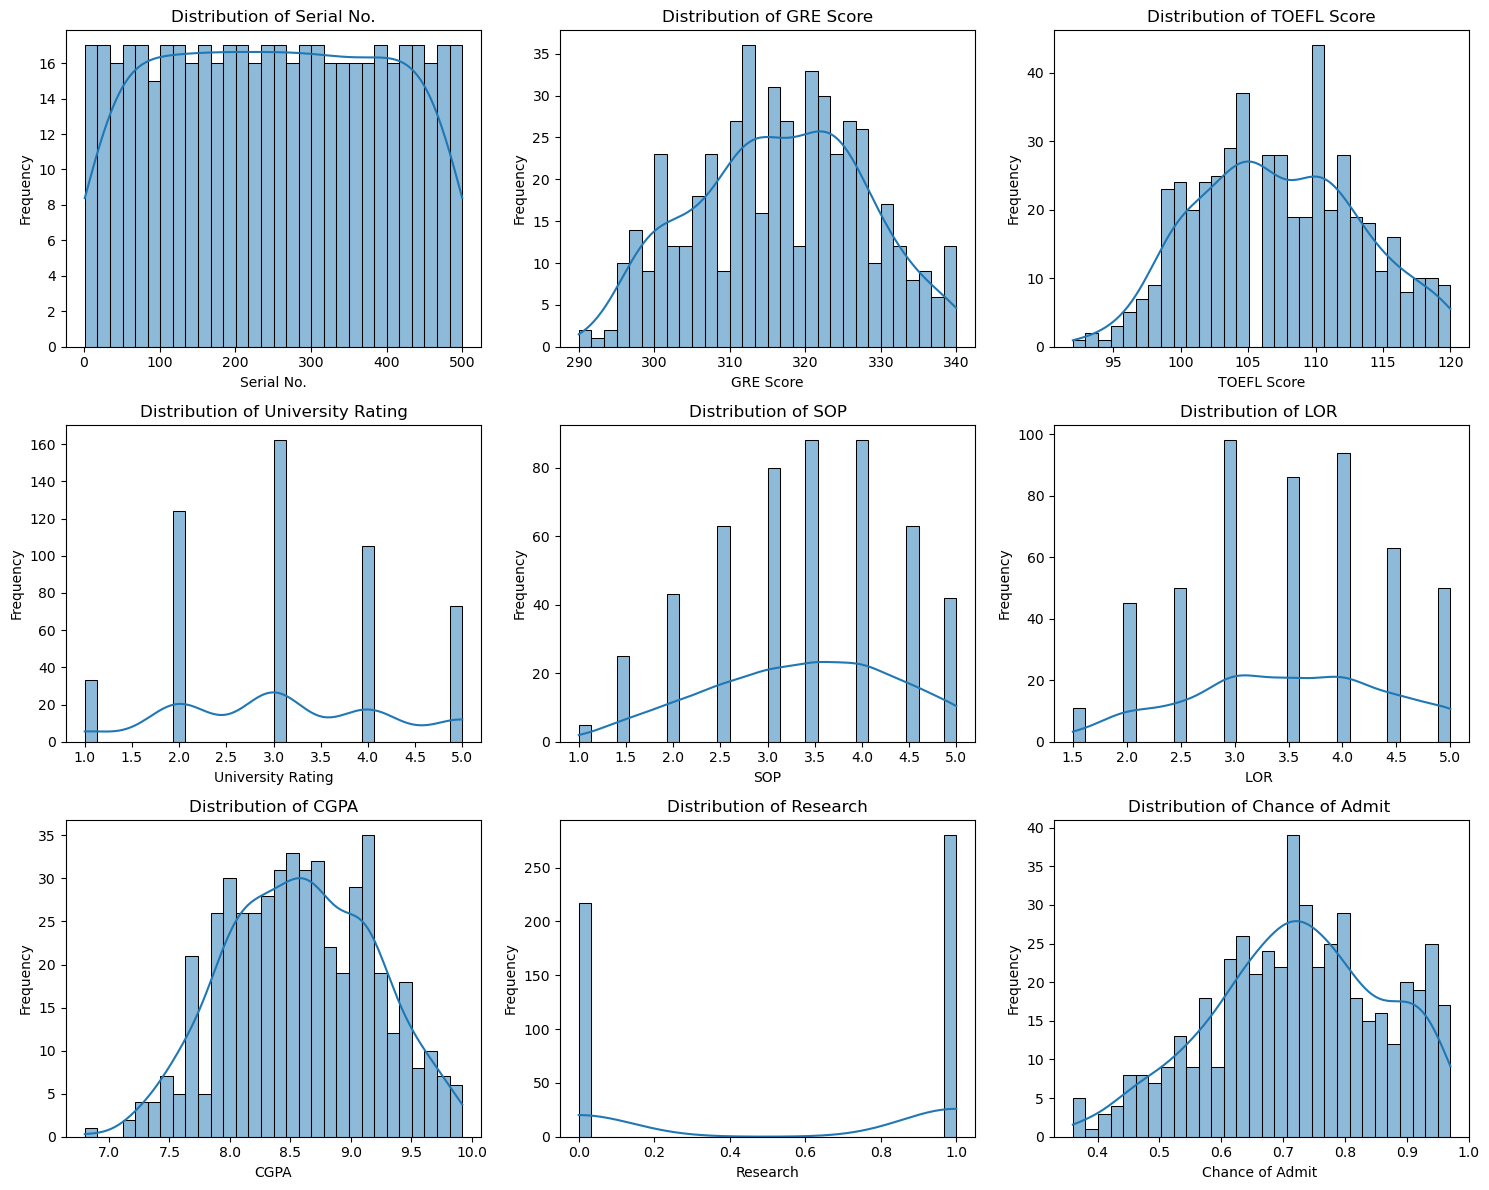

In [9]:
# Plot histograms for each feature
plt.figure(figsize=(15, 12))
for i, column in enumerate(cleaned_data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(cleaned_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    print(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


StandardScaler is the recommended scaling method for most of our features as they appear to be approximately normally distributed, making StandardScaler ideal since it standardizes to a mean of 0 and a standard deviation of 1.

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = cleaned_data.drop(columns=['Serial No.'])
y = cleaned_data['Chance of Admit ']

scaler = StandardScaler()

X_numerical = X.drop(columns=['Chance of Admit ', 'Research'])
X_scaled = scaler.fit_transform(X_numerical)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_numerical.columns)


X_scaled_df['Chance of Admit'] = X['Chance of Admit '].values
X_scaled_df['Research'] = X['Research'].values

print(X_scaled_df.head())


   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.818719     1.781161           0.769761  1.136549  1.097138  1.777188   
1   0.660668    -0.043044           0.769761  0.629489  1.097138  0.478836   
2  -0.051979    -0.540555          -0.107696 -0.384631  0.007672 -0.969326   
3   0.482506     0.454466          -0.107696  0.122429 -1.081793  0.145925   
4  -0.230140    -0.706391          -0.985153 -1.398751 -0.537061 -0.619770   

   Chance of Admit  Research  
0             0.92         1  
1             0.76         1  
2             0.72         1  
3             0.80         1  
4             0.65         0  


In [11]:
bins = [0.3, 0.5, 0.7, 1.0]  # Define the bins
labels = ['low', 'medium', 'high']  # Define the labels for each bin

# Create the new category column based on the original "Chance of Admit"
X_scaled_df['Admit Category'] = pd.cut(X_scaled_df['Chance of Admit'], bins=bins, labels=labels)

# Print the head of the DataFrame to check the new category column
print(X_scaled_df.head())

   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.818719     1.781161           0.769761  1.136549  1.097138  1.777188   
1   0.660668    -0.043044           0.769761  0.629489  1.097138  0.478836   
2  -0.051979    -0.540555          -0.107696 -0.384631  0.007672 -0.969326   
3   0.482506     0.454466          -0.107696  0.122429 -1.081793  0.145925   
4  -0.230140    -0.706391          -0.985153 -1.398751 -0.537061 -0.619770   

   Chance of Admit  Research Admit Category  
0             0.92         1           high  
1             0.76         1           high  
2             0.72         1           high  
3             0.80         1           high  
4             0.65         0         medium  


**Now lets perform LDA**

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = X_scaled_df.drop(columns=['Chance of Admit', 'Admit Category'])
y = X_scaled_df['Admit Category']

lda = LDA()
lda.fit(X, y)

X_lda = lda.transform(X)

num_classes = len(y.unique())

column_names = [f'LD{i+1}' for i in range(num_classes - 1)]  # Generate names LD1, LD2, ...

X_lda_df = pd.DataFrame(X_lda, columns=column_names)

# Display the result
print(X_lda_df.head())


        LD1       LD2
0 -2.737006  0.620835
1 -1.176971 -0.503039
2  0.565854 -1.483682
3 -0.223529 -1.011302
4  1.067244  1.077031


LDA produces C-1 dimensions, where C is the number of classes in the target variable. This means if you have three categories (e.g., low, medium, high), LDA will produce 2 components (LD1 and LD2). Therefore, you have to retain both components because they are essential for maximizing class separability.

# **The Influence of Dimensionality Reduction**
1. Dimensionality reduction often leads to improved performance in classification tasks, as it reduces noise and overfitting. By retaining only the most informative features, the model can generalize better on unseen data.
2. Fewer dimensions result in faster computations, making the model training and prediction process more efficient, especially with large datasets.
With fewer dimensions, the model becomes easier to interpret.
3. Each linear discriminant can be analyzed to understand which features contribute most to class separation.

# Doing Linear regression using TensorFlow

Epoch 0: Loss = 0.7506688833236694
Epoch 100: Loss = 0.028275083750486374
Epoch 200: Loss = 0.01937198080122471
Epoch 300: Loss = 0.019228912889957428
Epoch 400: Loss = 0.01922660879790783
Epoch 500: Loss = 0.019226569682359695
Epoch 600: Loss = 0.019226569682359695
Epoch 700: Loss = 0.019226569682359695
Epoch 800: Loss = 0.019226573407649994
Epoch 900: Loss = 0.019226571545004845


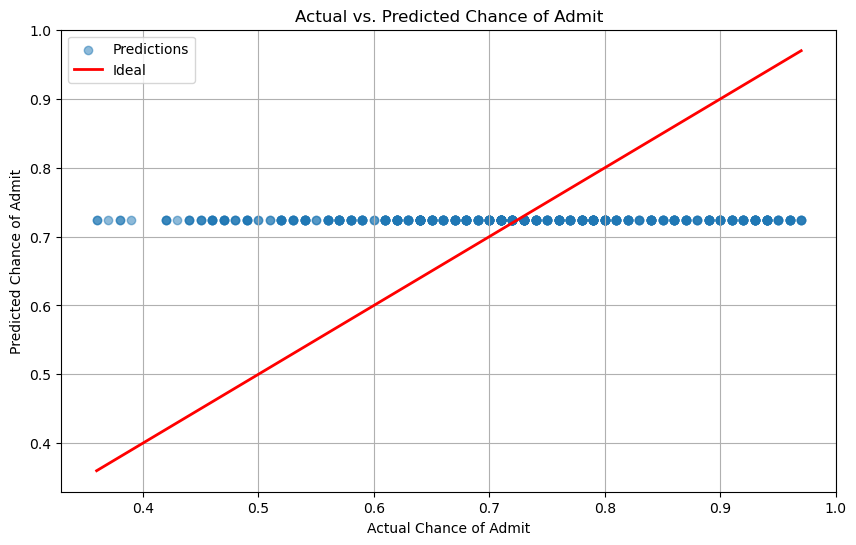

In [13]:
y = X_scaled_df['Chance of Admit']  # Continuous values for regression
X_lda_tensor = tf.convert_to_tensor(X_lda, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y.values, dtype=tf.float32)

# Initialize weights and biases
n_features = X_lda.shape[1]
weights = tf.Variable(tf.random.normal([n_features, 1]), name='weights')
bias = tf.Variable(tf.random.normal([1]), name='bias')

# Linear regression model
def linear_regression(X):
    return tf.matmul(X, weights) + bias

# Mean Squared Error (MSE) Loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Using Stochastic Gradient Descent (SGD) optimizer
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

# Number of epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        y_pred = linear_regression(X_lda_tensor)  # Predict using current weights and bias
        loss = mean_squared_error(y_tensor, y_pred)

    # Compute gradients
    gradients = tape.gradient(loss, [weights, bias])

    # Update weights and bias using the optimizer
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.numpy()}')

# Final predictions after training
y_pred = linear_regression(X_lda_tensor)

# Visualizing the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_tensor.numpy(), y_pred.numpy(), alpha=0.5, label='Predictions')
plt.plot([min(y_tensor), max(y_tensor)], [min(y_tensor), max(y_tensor)], color='red', lw=2, label='Ideal')  # Diagonal line
plt.title('Actual vs. Predicted Chance of Admit')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.legend()
plt.grid()
plt.show()

R² Score: 0.82


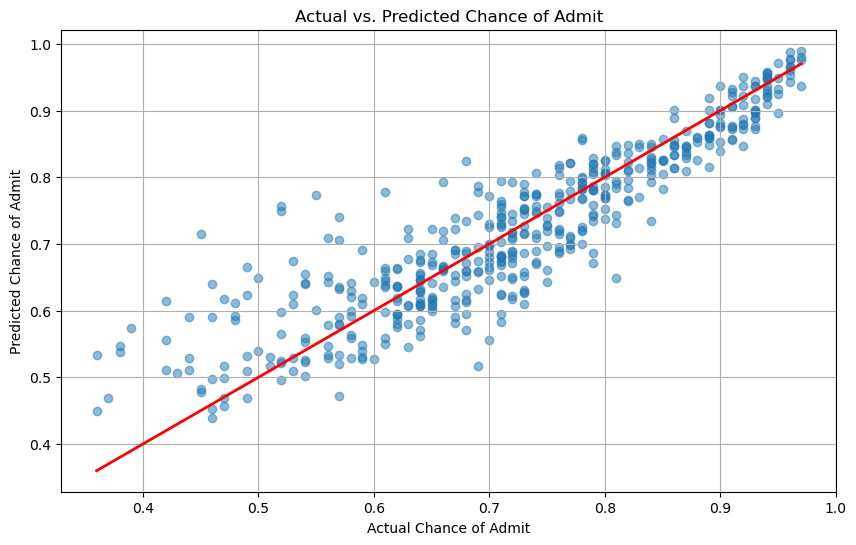

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_lda_df, y)

# Make predictions
y_pred = model.predict(X_lda_df)

# Calculate the percentage match (R² score)
r_squared = model.score(X_lda_df, y)
print(f'R² Score: {r_squared:.2f}')

# Visualizing the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Chance of Admit')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.grid()
plt.show()

In [15]:
print(X_scaled_df.head())

   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.818719     1.781161           0.769761  1.136549  1.097138  1.777188   
1   0.660668    -0.043044           0.769761  0.629489  1.097138  0.478836   
2  -0.051979    -0.540555          -0.107696 -0.384631  0.007672 -0.969326   
3   0.482506     0.454466          -0.107696  0.122429 -1.081793  0.145925   
4  -0.230140    -0.706391          -0.985153 -1.398751 -0.537061 -0.619770   

   Chance of Admit  Research Admit Category  
0             0.92         1           high  
1             0.76         1           high  
2             0.72         1           high  
3             0.80         1           high  
4             0.65         0         medium  


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
X = X_scaled_df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']]
y = X_scaled_df['Admit Category']

# Encode the target labels (high, medium, etc.) into numerical categories
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Convert the target labels to categorical (one-hot encoding)
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=3)  # Assuming 3 categories
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Function to build the logistic regression model
def build_model(learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for multi-class classification
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# List of learning rates to try
learning_rates = [0.05, 0.075, 0.15, 0.1, 0.01, 0.001, 0.0001]
histories = {}
accuracy_scores = []

for lr in learning_rates:
    print(f"\nTraining model with learning rate: {lr}")

    # Build and train the model
    model = build_model(learning_rate=lr)
    history = model.fit(X_train, y_train_categorical, epochs=50, validation_data=(X_test, y_test_categorical), batch_size=32, verbose=0)

    # Store history for plotting
    histories[lr] = history

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
    accuracy_scores.append(test_accuracy)
    print(f"Test Accuracy with lr={lr}: {test_accuracy:.4f}")


Training model with learning rate: 0.05
Test Accuracy with lr=0.05: 0.8300

Training model with learning rate: 0.075
Test Accuracy with lr=0.075: 0.8500

Training model with learning rate: 0.15
Test Accuracy with lr=0.15: 0.8300

Training model with learning rate: 0.1
Test Accuracy with lr=0.1: 0.8000

Training model with learning rate: 0.01
Test Accuracy with lr=0.01: 0.8100

Training model with learning rate: 0.001
Test Accuracy with lr=0.001: 0.6700

Training model with learning rate: 0.0001
Test Accuracy with lr=0.0001: 0.1700


Learning Rate = 0.075 produced the best accuracy at 83%, making it the optimal learning rate from the values you tested.

Learning Rate = 0.05 also performed quite well with 83% accuracy.
The other learning rates (0.15, 0.1, etc.) showed slightly lower performance, with the accuracy decreasing as the learning rate became too high or too low.

Higher learning rates like 0.15 and 0.1 might allow for faster training, as the model converges more quickly due to larger updates to weights in each epoch.

However, these rates might also make the model oscillate or miss the optimal solution, as seen by their relatively lower accuracy (82% compared to 85% for 0.075).

Lower learning rates like 0.001 and 0.0001 result in slower convergence, as seen from their lower final accuracy (75% and 42%). The model fails to reach the optimal solution in a reasonable number of epochs.

In [22]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the model
logreg = LogisticRegression(max_iter=1000)

# Define the parameter grid for tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'liblinear']
}

# Perform grid search with cross-validation
grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Best parameters and the best model after tuning
print("Logistic Regression - Best parameters:", grid_search_lr.best_params_)
best_model_lr = grid_search_lr.best_estimator_

# Predict on test data using the best model
y_pred_lr = best_model_lr.predict(X_test)
y_prob_lr = best_model_lr.predict_proba(X_test)  # Probabilities for all classes

# Metrics for Logistic Regression (Best Model)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# For AUC, specify 'ovr' (one-vs-rest) for multiclass ROC AUC
auc_lr = roc_auc_score(y_test, y_prob_lr, multi_class='ovr', average='weighted')

# Print the results
print(f"Logistic Regression - Best Model Metrics:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")
print(f"AUC: {auc_lr}")


NameError: name 'LogisticRegression' is not defined

# Random Forest

In [ ]:

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best parameters and the best model after tuning
print("Random Forest - Best parameters:", grid_search_rf.best_params_)
best_model_rf = grid_search_rf.best_estimator_

# Predict on test data using the best model
y_pred_rf = best_model_rf.predict(X_test)
y_prob_rf = best_model_rf.predict_proba(X_test)  # Probabilities for all classes

# Metrics for Random Forest (Best Model)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# For AUC, specify 'ovr' (one-vs-rest) for multiclass ROC AUC
auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr', average='weighted')

# Print the results
print(f"Random Forest - Best Model Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"AUC: {auc_rf}")


# Gradient Boosted Decision Trees (GBDT)

In [ ]:
gbdt = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid_gb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Perform grid search with cross-validation
grid_search_gb = GridSearchCV(gbdt, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# Best parameters and the best model after tuning
print("Gradient Boosting - Best parameters:", grid_search_gb.best_params_)
best_model_gbdt = grid_search_gb.best_estimator_

# Predict on test data using the best model
y_pred_gbdt = best_model_gbdt.predict(X_test)
y_prob_gbdt = best_model_gbdt.predict_proba(X_test)  # Probabilities for all classes

# Metrics for Gradient Boosting (Best Model)
accuracy_gbdt = accuracy_score(y_test, y_pred_gbdt)
precision_gbdt = precision_score(y_test, y_pred_gbdt, average='weighted')
recall_gbdt = recall_score(y_test, y_pred_gbdt, average='weighted')
f1_gbdt = f1_score(y_test, y_pred_gbdt, average='weighted')

# For AUC, specify 'ovr' (one-vs-rest) for multiclass ROC AUC
auc_gbdt = roc_auc_score(y_test, y_prob_gbdt, multi_class='ovr', average='weighted')

# Print the results
print(f"Gradient Boosting - Best Model Metrics:")
print(f"Accuracy: {accuracy_gbdt}")
print(f"Precision: {precision_gbdt}")
print(f"Recall: {recall_gbdt}")
print(f"F1 Score: {f1_gbdt}")
print(f"AUC: {auc_gbdt}")